# HW7

## 2. verify PAC bound

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import math

In [66]:
def single_generator():
    '''
    generate a single training set
    '''
    x = np.random.uniform(-1,1,200)
    s = []
    for i in range(len(x)):
        if x[i] < 0:
            s.append([x[i],0])
        else:
            s.append([x[i],1])
    
    return s

def generator(snum = 10000):
    '''
    generate snum training sets
    '''
    S = []
    for i in range(snum):
        S.append(single_generator())
    return S

def find_a(s):
    a = 1
    for p in s:
        if p[0] >= 0 and p[0] < a:
            a = p[0]
    return a

def true_risk(s, a):
    return a/2
#     tr = 0
#     for p in s:
#         if p[0] >=0 and p[0] < a:
#             tr += 1
#     return tr/len(s)

def empirical_risk(s, a):
    er = 0
    for p in s:
        pred = 0
        if p[0] >=a:
            pred = 1
        er += abs(p[1]-pred)
    return er/len(s)

In [67]:
S = generator()
tr = []
er = []
for s in S:
    a = find_a(s)
    tr.append(true_risk(s,a))
    er.append(empirical_risk(s,a))

In [68]:
diff = [tr[i] - er[i] for i in range(len(tr))]

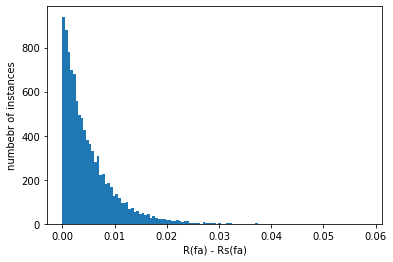

In [69]:
plt.hist(diff, bins='auto')  # arguments are passed to np.histogram
# plt.show()
plt.xlabel('R(fa) - Rs(fa)')
plt.ylabel('numbebr of instances')
plt.savefig('q26.pdf')

In [70]:
round(np.quantile(diff, .95),5)

0.01477

In [71]:
len(S)

10000

## Q-learning

In [2]:
def print_Qtable(Q_table):
    for q in Q_table.keys():
        if q == 'As':
            print('Q(A, stay) = ',round(Q_table[q],5))
        elif q == 'Am':
            print('Q(A, move) = ',round(Q_table[q],5))
        elif q == 'Bs':
            print('Q(B, stay) = ',round(Q_table[q],5))
        elif q == 'Bm':
            print('Q(B, move) = ',round(Q_table[q],5))

### Q3.1

In [8]:
# two states: A,B
# two actions (w/. reward): stay (1), move (0)
Q_table = {'As':0, 'Am':0, 'Bs':0, 'Bm':0}
A = ['s','m']
S = ['A','B']
R = {'s':1, 'm':0}
gamma = 0.9

# policy for q3.1: move or stay with 1/2 prob
alpha = 0.5 # step size
epoch = 200
init_sate = 'A'

In [9]:
curr_s = 'A'
for i in range(epoch):
    a = A[np.random.randint(2)]
    if a == 'm':
        next_s = [s for s in S if s != curr_s][0]
    else:
        next_s = curr_s
    max_q = max(Q_table[next_s+'s'],Q_table[next_s+'m'])
    Q_table[curr_s+a] = (1-alpha)*Q_table[curr_s+a] + alpha*(R[a] + gamma*max_q)
    curr_s = next_s

In [10]:
print_Qtable(Q_table)

Q(A, stay) =  9.48078
Q(A, move) =  7.99048
Q(B, stay) =  9.00271
Q(B, move) =  8.29473


### Q3.2

In [117]:
# two states: A,B
# two actions (w/. reward): stay (1), move (0)
Q_table = {'As':0, 'Am':0, 'Bs':0, 'Bm':0}
A = ['s','m']
S = ['A','B']
R = {'s':1, 'm':0}
gamma = 0.9

# policy for q3.2: 1/2 prob to choose argmax_a(Q(s,a)), 1/2 prob to uniformly choose between stay or move at state s
alpha = 0.5 # step size
epoch = 200
init_sate = 'A'

In [118]:
curr_s = 'A'
for i in range(epoch):
    e = np.random.randint(2)
    if e == 0:
        # greedily choose the current best action
        if Q_table[curr_s+'s'] > Q_table[curr_s+'m']:
            a = 's'
        else:
            a = 'm'
    elif e == 1:
        # randomly choose an action
        a = A[np.random.randint(2)]
    if a == 'm':
        next_s = [s for s in S if s != curr_s][0]
    else:
        next_s = curr_s
    max_q = max(Q_table[next_s+'s'],Q_table[next_s+'m'])
    Q_table[curr_s+a] = (1-alpha)*Q_table[curr_s+a] + alpha*(R[a] + gamma*max_q)
    curr_s = next_s

In [119]:
print_Qtable(Q_table)

Q(A, stay) =  9.82054
Q(A, move) =  8.69072
Q(B, stay) =  9.73766
Q(B, move) =  8.79053


### Q3.3

In [121]:
# two states: A,B
# two actions (w/. reward): stay (1), move (0)
Q_table = {'As':0, 'Am':0, 'Bs':0, 'Bm':0}
A = ['s','m']
S = ['A','B']
R = {'s':1, 'm':0}
gamma = 0.9

# policy for q3.2: choose argmax_a(Q(s,a))
alpha = 0.5 # step size
epoch = 200
init_sate = 'A'

In [122]:
curr_s = 'A'
for i in range(epoch):
    # greedily choose the current best action
    if Q_table[curr_s+'s'] > Q_table[curr_s+'m']:
        a = 's'
    else:
        a = 'm'
    if a == 'm':
        next_s = [s for s in S if s != curr_s][0]
    else:
        next_s = curr_s
    max_q = max(Q_table[next_s+'s'],Q_table[next_s+'m'])
    Q_table[curr_s+a] = (1-alpha)*Q_table[curr_s+a] + alpha*(R[a] + gamma*max_q)
    curr_s = next_s

In [123]:
print_Qtable(Q_table)

Q(A, stay) =  0
Q(A, move) =  0.0
Q(B, stay) =  0
Q(B, move) =  0.0
